In [23]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = 'data/'
out = 'out/'

pd.options.display.max_rows = None
pd.options.display.max_columns = None
plt.style.use('ggplot')

# Introduction

__Introduction:__

Heart disease is one fo the main cause of death in the U.S. According to the CDC, 1 in 5 death in the U.S. during 2020 was casued by heart disease. In this project we aim to discover the correlation between coronary disease rate and different health-related indicators. We will train some machine learning models that aim to predict whether a patient has heart disease using an array of input features. This project will help us gain a better understanding of heart diseases and create preventative solutions that target high-risk patients. This is a classification problem and our target variable is HeartDisease. We have 319,795 total data points and 18 features.

__Feature Description:__

"HeartDisease" is our target variable. It contains values 'Yes' and 'No' indicating whether a patient has heart disease. "BMI" refers to the patient body mass index. "Smoking" is a boolean variable that indicates whether the patient has smoked more than 100 cigarettes in his/her life. The column "AlcoholDrinking" refers to whether the patient is a heavy drinker (more than 14 drinks a week for man and 7 drinks a week for women). "Stroke" indicates whether the patient ever had a stroke. The "PhysicalHealth" column indicates the number of days in the past 30 the patient is injured for. "Mental Health"is a column that indicates how many days in the past 30 the patient thinks that his/her mental health is not good. "DiffWalking" is a boolean variable indicating whether the patient has difficulty walking or climbing stairs. "Sex" is a feature indicating patient's sex. "AgeCategory" describes the age bucket of the patient. "Race"is a categorical feature that describes the patient's race. "Diabetic" is a boolean variable describing whether the patient is diabetic. "PhysicalActivity" is a boolean variable that indicates whether the patient has done physical activities in the past 30 days. "GenHealth" is a self-reported ordinal feature of whether the patient this his/her health is good in general. "SleepTime" is a continuos variable detailing the average length of sleep the patient gets. "Asmthma" is a boolean variable indicating whether the patient has asthma. "KidneyDisease" is a boolean variable indicating whether the patient has kidney disease (not including kidney stones, bladder infection, or incontinence). "SkinCancer" indicates whether the patients has/had skin cancer.

__Dataset:__

This dataset is from Kaggle and uses the 2020 annual CDC survey data of 400k adults. The data is originally collected by the CDC's Behavioral Risk Factor Surveillance System (BRFSS). It was collected through interviews with more than 400,000 adults with respect to their health status. Originally the dataset has more than 300 featuers, which the Kaggle user, Kamil Pytlak has reduced to 20.

__Literature Research:__

Kaggle user Wessam Salah Walid tried to predict HeartDisease using all input features. He applied over-sampling method with respect to the target variables and adopted the random forest method to achieve around 93% test accuracy. His KNN model achieved around 88% test accuracy. His logistic regression model achieved around 75% test accuracy, and his XGBoost model achieved around 77% test accuracy. Lastly, he adopted a suite of models and applied a majority rule voting mechanism that incorporated all the above models and achieved around 91% test accuracy.

# EDA

In [2]:
df = pd.read_csv(data+'heart_2020_cleaned.csv')
print(df.shape)
df.head()

(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


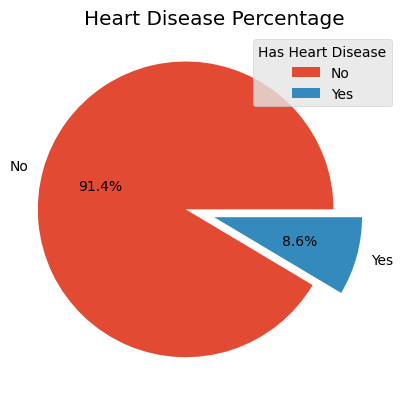

In [5]:
plt.figure()
plt.pie(
    df.HeartDisease.value_counts(), 
    labels = df.HeartDisease.value_counts().index,
    explode = [0.2, 0],
    autopct='%1.1f%%',
)
plt.title("Heart Disease Percentage")
plt.legend(title="Has Heart Disease")

plt.savefig(out+"heart_disease_pie.png")
plt.show()

Figure 1.

Around 91.4% of survey participants do not have heart disease while 8.6% have heart disease.

/var/folders/8k/sg9fnm6s2zs124qmnwsc7dq40000gn/T/ipykernel_84037/2400681239.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cols, rotation='vertical')


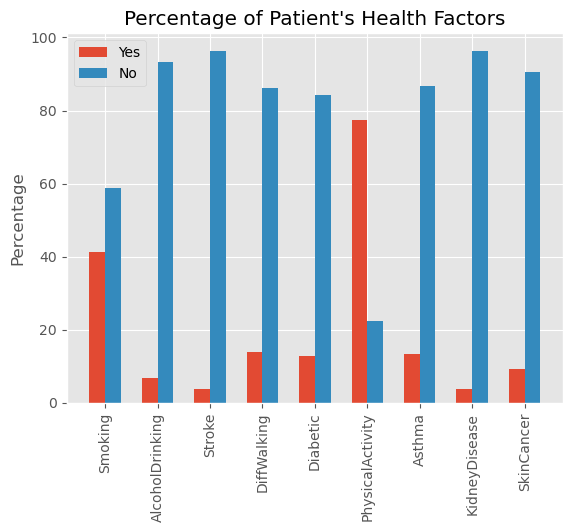

In [6]:
cols = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", \
        "Asthma", "KidneyDisease", "SkinCancer"]
yes_l = list()
no_l = list()
for c in cols:
    yes_l.append(np.round(df[c].value_counts()["Yes"]/len(df)*100, 2))
    no_l.append(np.round(df[c].value_counts()["No"]/len(df)*100, 2))

fig, ax = plt.subplots(1, 1)
width = 0.3   
i = np.arange(len(cols))
ax.bar(i, yes_l, width, label='Yes')
ax.bar(i + width, no_l, width, label='No')
ax.legend()
ax.set_xticklabels(cols, rotation='vertical')
ax.set_ylabel("Percentage")
ax.set_xticks(i+width/2)
ax.set_title("Percentage of Patient's Health Factors")

plt.savefig(out+"categorical_feat.png")
plt.show()

Figure 2.

Figure shows the percentage break down for some of the categorical variables. Around 41% participants have smoked more than 100 cigarettes in their life. About 7.8% of the patients identify themselves as heavy drinker. Around 3.7% of patients have had stroked. Around 13.9% patients have difficulty walking. Around 12-13% of patients are diabetic and 2.1% borderline diabetic. Around 78% participants work out regularly. About 13.4% of patients have asthma. 3.7% of patients have kidney diseases, and 9% of patients have skin cancer. 

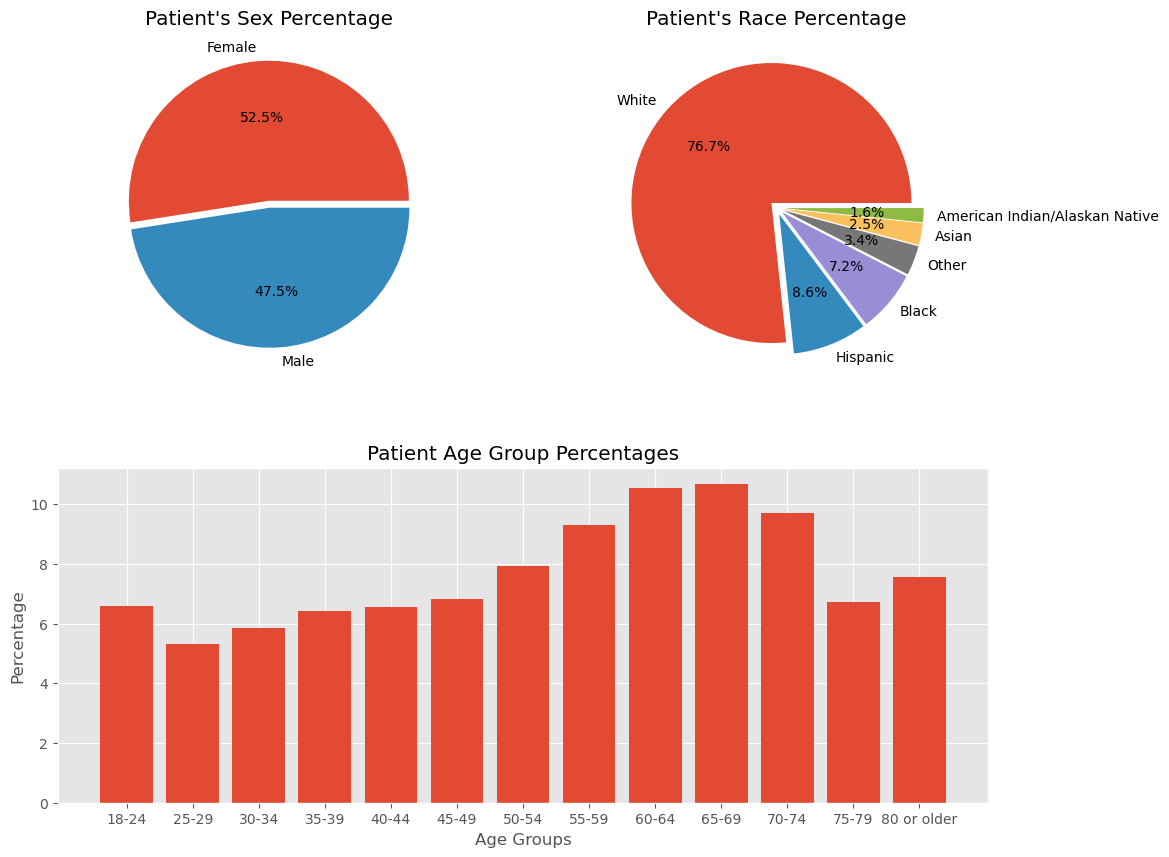

In [7]:
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
plt.pie(
    df.Sex.value_counts(), 
    labels = df.Sex.value_counts().index,
    explode = [0.05, 0],
    autopct='%1.1f%%',
)
plt.title("Patient's Sex Percentage")

plt.subplot(2,2,2)
plt.pie(
    df.Race.value_counts(), 
    labels = df.Race.value_counts().index,
    explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    autopct='%1.1f%%',
)
plt.title("Patient's Race Percentage")

grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[1, :])
plt.bar(
    df.AgeCategory.value_counts(sort=False).sort_index().index, 
    np.round(100*df.AgeCategory.value_counts(sort=False).sort_index()/len(df), 2)
)
plt.ylabel("Percentage")
plt.xlabel("Age Groups")
plt.title("Patient Age Group Percentages")

plt.savefig(out+"demographic_feat.png")
plt.show()

Figure 3.

Figure 3 shows the demographic break down of survey participants. Out of all participatns, 47.5% are male and 52.5% are female. The most prodominent race is white (76.7%), then hispanic (8.6%), black (7.2%), other (3.4%), Asian (2.5%) and American Indian/Alaskan Native make up about 1.6% of the total number of people surveyed. 

<Figure size 500x300 with 0 Axes>

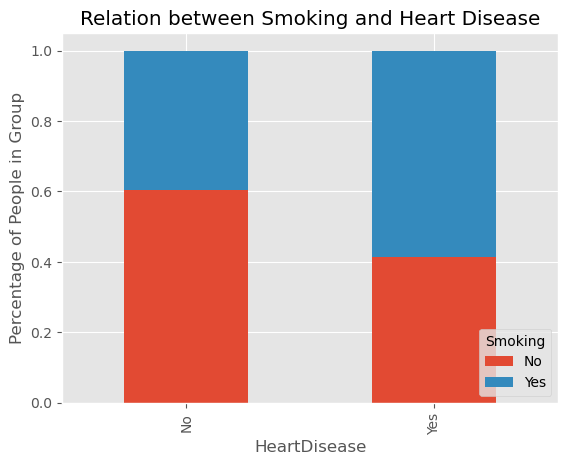

In [8]:
count_matrix = df.groupby(["HeartDisease", "Smoking"]).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.title("Relation between Smoking and Heart Disease")
plt.ylabel('Percentage of People in Group')
plt.legend(loc=4, title="Smoking")
plt.show()

Figure 4.

This graph shows the percentage of people who smoke vs the population that have hear disease. In the figure, the blue represents the percentage of the population that have smoked more othan 100 cigarettes, and the red represents the percentage of people that don't smoke. We see that people with heart disease have a larger proportion of smokers than people who don't have heart disease. This indicates a possible correlation between smoking and heart diseases.

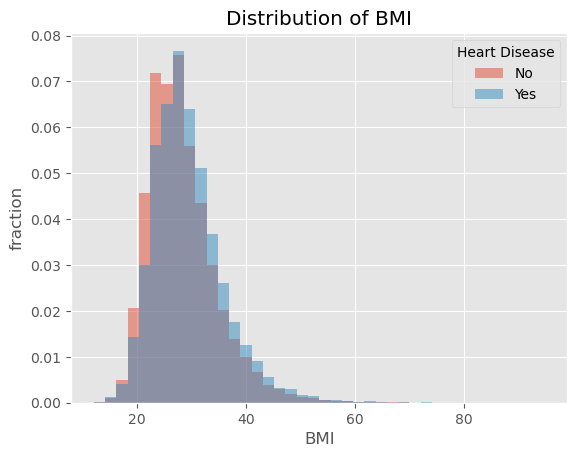

In [9]:
categories = df['HeartDisease'].unique()
bin_range = (df['BMI'].min(),df['BMI'].max())

for c in categories:
    plt.hist(df[df['HeartDisease']==c]['BMI'],alpha=0.5,label=c,range=bin_range,bins=40,density=True)
plt.legend(title="Heart Disease")
plt.ylabel('fraction')
plt.xlabel('BMI')
plt.title("Distribution of BMI")
plt.show()

Figure 5.

Figure 5 shows two histograms of the body-mass index. The blue histogram shows the distribution of BMI for people with heart diseases, and the red histogram shows the distribution of BMI of those who don't have heart disease. We see that the two histograms follow similar distribution except that the blue histogram seems to have slighly higher mean and median than the red histogram. This indicates that in general people with heart diseases have higher body-mass index than people without heart disease. 

# Data Preprocessing

Our data is IID because each row represents a unique survey participant who is independent from other participants. There is no group structure, and there is no time series data. Therefore, we can either use a classic train, validation, test split of proportion (0.6, 0.2, 0.2) or we can use k-fold split to split the data into multiple folds of training and testing sets. We will first utilize the traditional train, validation, test split.

In [18]:
# Train test split
X = df.drop("HeartDisease", axis=1)
y = df[["HeartDisease"]]
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size= 0.4, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=2)

print("Train size: ", len(X_train), "(", np.round(len(X_train)/len(X)*100, 2), "%)")
print("Validation size: ", len(X_val), "(", np.round(len(X_val)/len(X)*100, 2), "%)")
print("Test size: ", len(X_test), "(", np.round(len(X_test)/len(X)*100, 2), "%)")

Train size:  191877 ( 60.0 %)
Validation size:  63959 ( 20.0 %)
Test size:  63959 ( 20.0 %)


In [19]:
# Replace Yes/No with boolean variables
bool_col = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", \
            "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
for col in bool_col:
    df[col] = df[col].replace(("Yes", "No"), (1, 0))

In [24]:
# Apply transformers
ord_features = ["GenHealth"]
ord_cat = [["Poor", "Fair", "Good", "Very good", "Excellent"]]

ohe_features = ["Sex", "AgeCategory", "Race", "Diabetic"]
standard_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ord_cat), ord_features),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), ohe_features),
        ('std', StandardScaler(), standard_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)

(191877, 17)
(191877, 30)


In [21]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


# Reference

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20Disease%20in%20the%20United%20States&text=About%20697%2C000%20people%20in%20the,1%20in%20every%205%20deaths
https://www.kaggle.com/code/wessamwalid/heart-disease-prediction-eda-modelling